In [218]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [219]:
# there are two datasets in this project one caontain fake news and one contain real news . Lets load both
fake = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Fake-News-Project\\Fake News Project\\Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [220]:
true = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Fake-News-Project\\Fake News Project\\True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [221]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [224]:
true.isnull().sum()          # no null present 

title      0
text       0
subject    0
date       0
dtype: int64

In [225]:
print('FAKE SHAPE:-',fake.shape)
print('')
print('')
print('TRUE SHAPE:-',true.shape)

FAKE SHAPE:- (23481, 4)


TRUE SHAPE:- (21417, 4)


In [226]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [227]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [228]:
# lets make a new column name 'Label' which contain 0 for fake news and 1 for real news
fake['label'] = 0 

In [229]:
true['label'] = 1

In [230]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [231]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [232]:
fake.shape

(23481, 5)

In [233]:
true.shape

(21417, 5)

In [234]:
# Lets merge both dataframes 

data = pd.concat([fake,true],axis=0)
data.sample(frac=1)         # shuffle


,title,text,subject,date,label
7630,Supreme Court Just Delivered HUGE Win For Sam...,"In big news coming out of the Supreme Court, i...",News,"March 7, 2016",0
4126,MUTINY: Even Trump’s Own Employees Are Saying...,Donald Trump supporters often say that they ar...,News,"October 19, 2016",0
206,Trump will announce new U.S. security strategy...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"December 12, 2017",1
4273,"Insurance, medical groups urge Trump to keep f...",WASHINGTON (Reuters) - Major medical groups ke...,politicsNews,"April 12, 2017",1
11383,"China, Pakistan to look at including Afghanist...",BEIJING (Reuters) - China and Pakistan will lo...,worldnews,"December 26, 2017",1
...,...,...,...,...,...
1011,U.S. House tax chief says SALT deduction meeti...,WASHINGTON (Reuters) - A key meeting between R...,politicsNews,"October 26, 2017",1
20874,HOW OBAMA MADE IT POSSIBLE For Protesters To B...,So is anyone else wondering why the cop-hating...,left-news,"Mar 14, 2016",0
20747,Cuban dissidents in electoral challenge as Cas...,HAVANA (Reuters) - Opponents of the Cuban gove...,worldnews,"September 7, 2017",1
10601,Wife of 'American Sniper' making waves in Texa...,"FORT WORTH, Texas (Reuters) - The widow of a s...",politicsNews,"February 29, 2016",1


In [235]:
data.shape

(44898, 5)

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

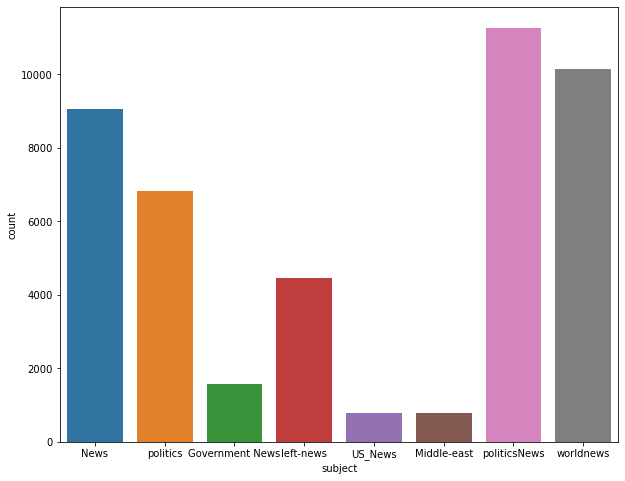

In [236]:
plt.figure(figsize = (10,8))
sns.countplot(x='subject', data= data)
data['subject'].value_counts()      

Max news have subjects about Political or from world news

# We can see that the date format is not the one we need. I will apply the appropriate date format for future purposes.  

In [237]:
# Correcting some data

data['date'] = data['date'].replace(['19-Feb-18'],'February 19, 2018')
data['date'] = data['date'].replace(['18-Feb-18'],'February 18, 2018')
data['date'] = data['date'].replace(['17-Feb-18'],'February 17, 2018')
data['date'] = data['date'].replace(['16-Feb-18'],'February 16, 2018')
data['date'] = data['date'].replace(['15-Feb-18'],'February 15, 2018')
data['date'] = data['date'].replace(['14-Feb-18'],'February 14, 2018')
data['date'] = data['date'].replace(['13-Feb-18'],'February 13, 2018')


# some more 

data['date'] = data['date'].str.replace('Dec ', 'December ')
data['date'] = data['date'].str.replace('Nov ', 'November ')
data['date'] = data['date'].str.replace('Oct ', 'October ')
data['date'] = data['date'].str.replace('Sep ', 'September ')
data['date'] = data['date'].str.replace('Aug ', 'August ')
data['date'] = data['date'].str.replace('Jul ', 'July ')
data['date'] = data['date'].str.replace('Jun ', 'June ')
data['date'] = data['date'].str.replace('Apr ', 'April ')
data['date'] = data['date'].str.replace('Mar ', 'March ')
data['date'] = data['date'].str.replace('Feb ', 'February ')
data['date'] = data['date'].str.replace('Jan ', 'January ')

In [238]:
data['date'] = data['date'].str.replace(' ', '')

In [239]:
for i, val in enumerate(data['date']):
    data['date'].iloc[i] = pd.to_datetime(data['date'].iloc[i], format='%B%d,%Y', errors='coerce')

In [240]:
data['date'] = data['date'].astype('datetime64[ns]')

In [241]:
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.1+ MB


In [243]:
# lets make new column for date months and year and drop date columns 

data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data.head()

,title,text,subject,date,label,Day,Month,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,31.0,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,31.0,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,30.0,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,29.0,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,25.0,12.0,2017.0


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
 5   Day      44888 non-null  float64       
 6   Month    44888 non-null  float64       
 7   year     44888 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 4.1+ MB


In [245]:
data = data.drop('date',axis=1)

In [246]:
data.head()

,title,text,subject,label,Day,Month,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,31.0,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,31.0,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,30.0,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,29.0,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,25.0,12.0,2017.0


In [247]:
sub = data[['Month', 'label']]
sub = sub.dropna()
sub = sub.groupby(['Month'])['label'].sum()

In [248]:
sub

Month
1.0      996
2.0     1023
3.0     1174
4.0      926
5.0      899
6.0      975
7.0      878
8.0      922
9.0     3425
10.0    3508
11.0    3733
12.0    2958
Name: label, dtype: int64

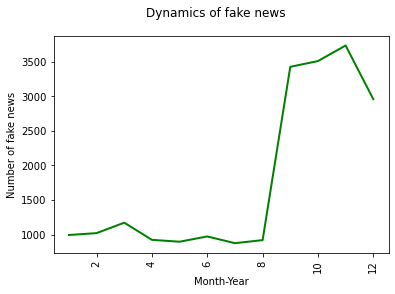

In [250]:
plt.suptitle('Dynamics of fake news')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')

# There is too much spike of fake news after August month

In [251]:
sub2 = data[['subject', 'label']]
sub2 = sub2.dropna()
sub2 = sub2.groupby(['subject'])['label'].sum()

In [252]:
sub2

subject
Government News        0
Middle-east            0
News                   0
US_News                0
left-news              0
politics               0
politicsNews       11272
worldnews          10145
Name: label, dtype: int64

<BarContainer object of 8 artists>

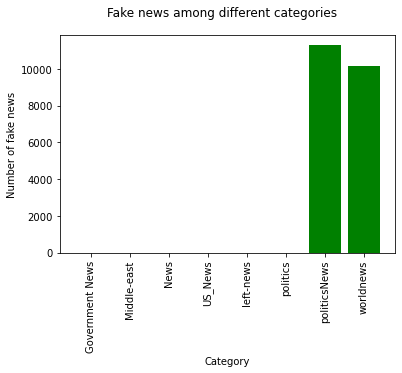

In [253]:
plt.suptitle('Fake news among different categories')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Category')

plt.bar(sub2.index, height=sub2.values, color='green')

# Clearly we understand from both these graphs that Dates and subject are crucial for algorithm to decide whether the news is fake or real

In [254]:
nlp = data

In [255]:
# I will add the 'subject' feature to the title field as it might have an influence on the outcome of classification.

nlp['title'] = nlp['title'] + ' ' + nlp['subject']

In [256]:

# Here I am going to take one example and try visualize tfidf as a wordcloud.

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['label'] == 1]['title'].iloc[0:500] 

# We will take a slice of fake news, to see what vocabulary there looks like

tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [257]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df_words.T.sum(axis=1)

Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

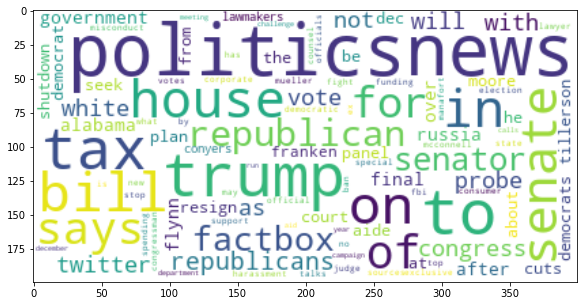

In [258]:
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')

# And we can also see out 'subject' feature in the foreground as it has been added manually in every title. Therefore, out vectorizer considers it as an important & frequent word.

In [259]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.feature_extraction.text import TfidfVectorizer


In [260]:
nlp.head()

,title,text,subject,label,Day,Month,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,31.0,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,31.0,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,30.0,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,29.0,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,25.0,12.0,2017.0


# Remove Regular Expressions

In [261]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'

nlp['title'] = nlp['title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [262]:
# Replace email addresses with 'email'

nlp['title'] = nlp['title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [263]:
# Replace URLs with 'webaddress'

nlp['title'] = nlp['title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [264]:
# Replace money symbols with 'moneysymb'

nlp['title'] = nlp['title'].str.replace(r'£|\$', 'dollers')

In [265]:
# Replace numbers with 'numbr'
nlp['title'] = nlp['title'].str.replace(r'\d+(\.\d+)?', 'numbr')

# REMOVE PUNCTUATIONS

In [266]:
nlp['title'] = nlp['title'].str.replace(r'[^\w\d\s]', ' ')

In [267]:
# REPLACE WHITESPACES BETWEEN TERMS WITH A SINGLE SPACE

nlp['title']  = nlp['title'].str.replace(r'\s+', ' ')

In [268]:
# Remove leading and trailing whitespaces 

nlp['title'] = nlp['title'].str.replace(r'^\s+|\s+?$','')

In [273]:
# First, I will tokenize words to pass it on to the SnowballStemmer method, which will take out lemmas from words.


import nltk
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

In [274]:
# An important step in every NLP-task is to get the roots of words in order not to distract the model by 'different' words.

from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

In [275]:
nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

In [276]:
# Take the standard english bag of stopwords from nltk.

from nltk.corpus import stopwords 
stopwords = stopwords.words('english')

In [277]:
from sklearn.feature_extraction.text import TfidfVectorizer
 

tfidf = TfidfVectorizer()                                   
X_text = tfidf.fit_transform(nlp['title'])                  ## for making text into vector form

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['label'], test_size=0.33, random_state=1)

In [279]:
scores = {}

# 1. Linear SVC

In [281]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = LinearSVC(max_iter=100, C=1.0)
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)
print(cross_val_score(clf, X_text, nlp['label'], cv=3))
print(accuracy_score(y_pred_SVM, y_test))

scores['LinearSVC'] = accuracy_score(y_pred_SVM, y_test)

[1. 1. 1.]
1.0


# This looks suspiciously good, but lets try another algorithm.

# 2. Naive Bayes

In [282]:
from sklearn.naive_bayes import MultinomialNB

clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

y_pred_MNB = clf2.predict(X_test)
print(cross_val_score(clf2, X_text, nlp['label'], cv=3))
print(accuracy_score(y_pred_MNB, y_test))

scores['MultinomialNB'] = accuracy_score(y_pred_MNB, y_test)

[0.95416277 0.94921823 0.95002005]
0.9784706755753526


In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


# 3. LOGISTIC REGRESSION

In [284]:
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(X_train, y_train)

y_pred_train = LG.predict(X_test)
print(cross_val_score(LG, X_text, nlp['label'], cv=3))
print(accuracy_score(y_pred_train, y_test))

scores['LogisticRegression'] = accuracy_score(y_pred_train, y_test)

[0.99953227 0.99792864 0.99124683]
0.9998650199095633


# 4. RANDOM FOREST CLASSIFIER

In [285]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

y_pred_trains = RF.predict(X_test)

print(cross_val_score(RF, X_text, nlp['label'], cv=3))
print(accuracy_score(y_pred_trains, y_test))

scores['Random Forest Classifier'] = accuracy_score(y_pred_trains, y_test)

[0.99966591 0.99832955 0.98583456]
0.999797529864345


In [286]:
scores

{'LinearSVC': 1.0,
 'MultinomialNB': 0.9784706755753526,
 'LogisticRegression': 0.9998650199095633,
 'Random Forest Classifier': 0.999797529864345}

In [297]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7750
           1       1.00      1.00      1.00      7067

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



In [287]:
# lets make a bar plot for scores 

<BarContainer object of 4 artists>

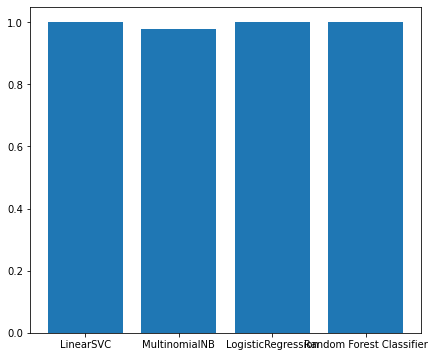

In [289]:
plt.figure(figsize=(7,6))
plt.bar(scores.keys(), scores.values())

In [290]:
# Since my model predict best omn test data so need to do hypertuning
# hence my model is ready to predict


# Model completed

In [296]:
import pickle

In [298]:
filename = 'Fake News.pickle'
pickle.dump(clf,open(filename,'wb'))